<a href="https://colab.research.google.com/github/msouto/20232_Estatistica_para_Engenharia/blob/main/Ex_5_teste_de_normalidade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# O gráfico de QQ
O gráfico de QQ (Quantile-Quantile) plot é uma ferramenta visual útil para avaliar se um conjunto de dados segue ou não uma distribuição normal. No QQ plot, os quantis observados dos seus dados são plotados em relação aos quantis esperados de uma distribuição teórica (normal, neste caso). Se os pontos no gráfico se aproximam de uma linha diagonal, isso sugere que os dados estão aproximadamente em conformidade com uma distribuição normal.

Vou fornecer um exemplo prático com código Python utilizando a biblioteca scipy.stats e matplotlib para criar um QQ plot. Considere o seguinte exemplo com dados de uma distribuição normal e de uma distribuição não normal:


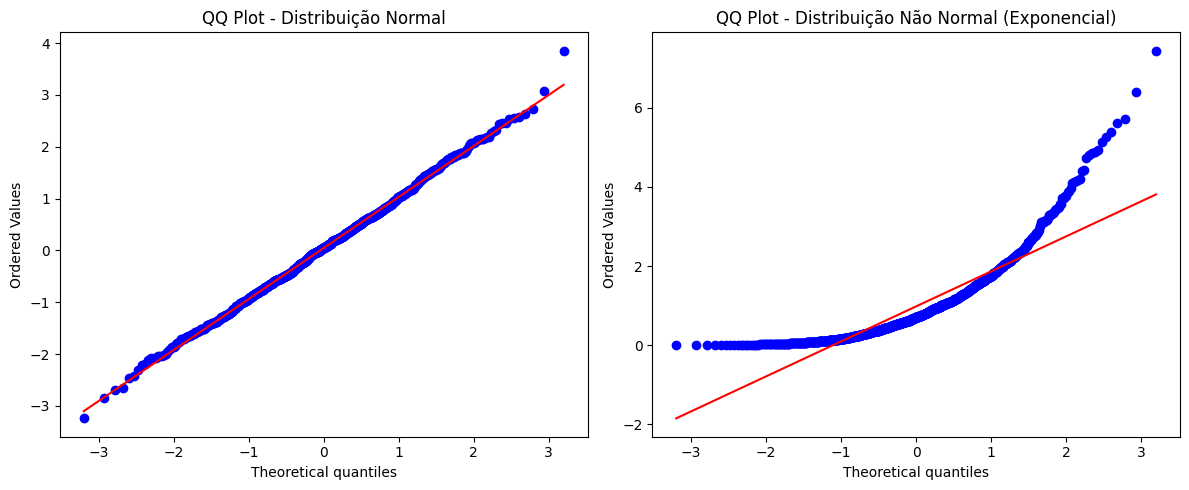

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import probplot

# Gerar dados de uma distribuição normal
dados_normais = np.random.normal(loc=0, scale=1, size=1000)

# Gerar dados de uma distribuição não normal (exponencial neste caso)
dados_nao_normais = np.random.exponential(scale=1, size=1000)

# Criar QQ plots
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
probplot(dados_normais, dist="norm", plot=plt)
plt.title('QQ Plot - Distribuição Normal')

plt.subplot(1, 2, 2)
probplot(dados_nao_normais, dist="norm", plot=plt)
plt.title('QQ Plot - Distribuição Não Normal (Exponencial)')

plt.tight_layout()
plt.show()


# Teste de Normalidade

O teste de Shapiro-Wilk é um dos testes de normalidade mais comuns e é adequado para amostras de tamanho moderado a grande (N até alguns milhares). Ele é geralmente considerado mais poderoso (ou seja, mais capaz de detectar desvios da normalidade) em comparação com outros testes de normalidade, especialmente em amostras maiores.

Entretanto, existem outros testes de normalidade, como o teste de Kolmogorov-Smirnov, o teste de Anderson-Darling e o teste de Lilliefors, entre outros. A escolha do teste pode depender do tamanho da amostra, da distribuição dos dados e de outras considerações específicas do problema.

O valor-p (p-value) obtido a partir do teste de normalidade indica a probabilidade de observar os dados se a hipótese nula (os dados seguem uma distribuição normal) for verdadeira. Um valor-p baixo (geralmente menor que 0,05) sugere que você pode rejeitar a hipótese nula e concluir que os dados não seguem uma distribuição normal. No entanto, é importante considerar o tamanho da amostra, pois para amostras muito grandes, pequenas divergências da normalidade podem resultar em valores-p significativos.

Lembre-se de que, em muitos casos, é mais importante avaliar visualmente gráficos, como QQ plots e histogramas, além de considerar a relevância prática do desvio da normalidade, em vez de depender apenas de testes estatísticos. Não há um limiar rígido para determinar se os dados são "suficientemente" normais; a interpretação deve levar em conta o contexto da análise

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


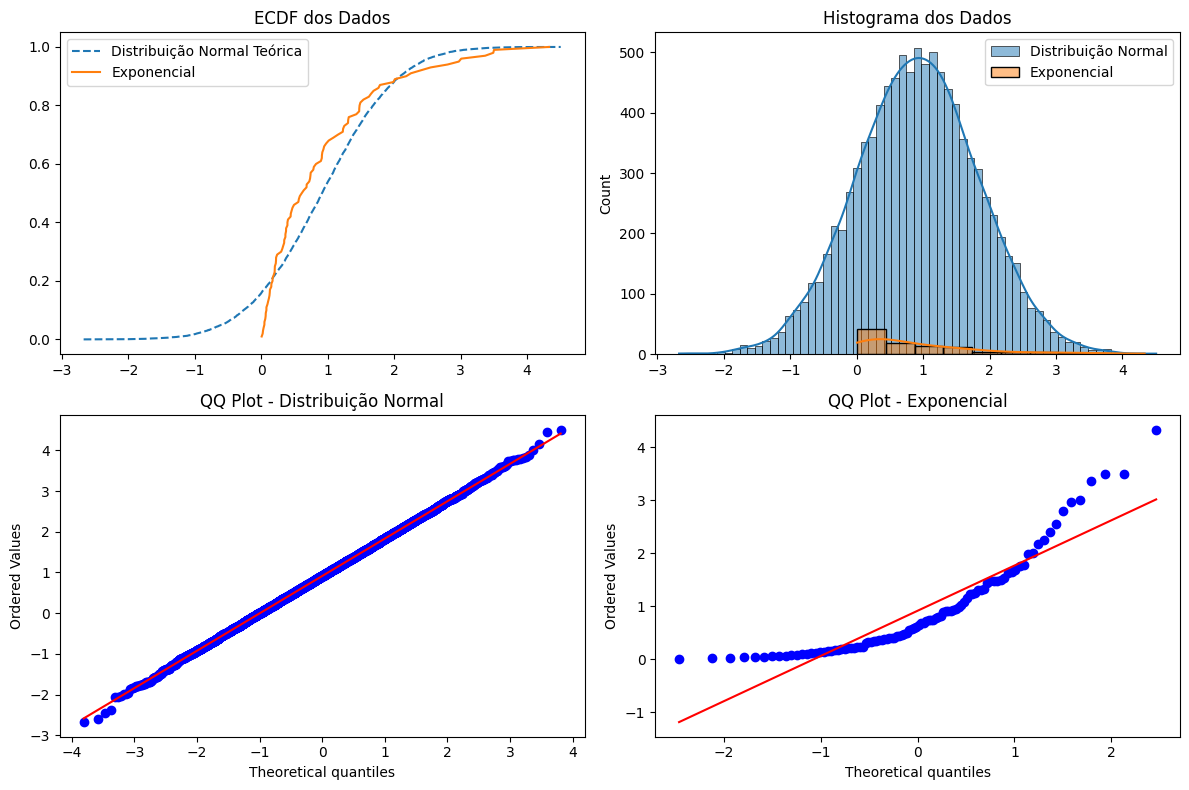

Teste Shapiro-Wilk para Distribuição Normal:
Estatística de teste: 0.9999350905418396, Valor p: 0.9987485408782959

Teste Shapiro-Wilk para Distribuição Exponencial:
Estatística de teste: 0.8359537720680237, Valor p: 3.7127756424837344e-09


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, probplot

# Definir função ECDF
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n + 1) / n
    return x, y

# Gerar dados com diferentes distribuições não normais
np.random.seed(42)  # Para reprodutibilidade
size = 100

data_exp = np.random.exponential(scale=1, size=size)
data_norm_samples = np.random.normal(np.mean(data_exp), np.std(data_exp), size=10000)

# Calcular ECDF para dados normalizados
x_theor, y_theor = ecdf(data_norm_samples)
x_exp, y_exp = ecdf(data_exp)

# Teste de Shapiro-Wilk para normalidade
stat_norm, p_norm = shapiro(data_norm_samples)
stat_exp, p_exp = shapiro(data_exp)

# Plotar os resultados
plt.figure(figsize=(12, 8))

# Plotar ECDF
plt.subplot(2, 2, 1)
plt.plot(x_theor, y_theor, label='Distribuição Normal Teórica', linestyle='--')
plt.plot(x_exp, y_exp, label='Exponencial')
plt.legend()
plt.title('ECDF dos Dados')

# Histograma
plt.subplot(2, 2, 2)
sns.histplot(data_norm_samples, kde=True, label='Distribuição Normal')
sns.histplot(data_exp, kde=True, label='Exponencial')
plt.legend()
plt.title('Histograma dos Dados')

# QQ Plot
plt.subplot(2, 2, 3)
probplot(data_norm_samples, dist="norm", plot=plt)
plt.title('QQ Plot - Distribuição Normal')

# QQ Plot
plt.subplot(2, 2, 4)
probplot(data_exp, dist="norm", plot=plt)
plt.title('QQ Plot - Exponencial')

plt.tight_layout()
plt.show()

# Resultados do teste de normalidade
print("Teste Shapiro-Wilk para Distribuição Normal:")
print(f"Estatística de teste: {stat_norm}, Valor p: {p_norm}")
print("")

print("Teste Shapiro-Wilk para Distribuição Exponencial:")
print(f"Estatística de teste: {stat_exp}, Valor p: {p_exp}")


# Escolha entre métodos paramétricos e não paramétricos

O teste de normalidade, como o teste de Shapiro-Wilk, pode ser utilizado como uma ferramenta para tomar decisões sobre a escolha entre métodos paramétricos e não paramétricos. No entanto, é importante notar que a escolha entre esses métodos não deve depender apenas do resultado do teste de normalidade, mas também de outras considerações, como o tamanho da amostra, a natureza dos dados e a robustez do método.

Algumas diretrizes gerais:

Se os dados são normalmente distribuídos:

Se o teste de normalidade indica que os dados seguem uma distribuição normal, métodos paramétricos são frequentemente preferidos, pois eles podem ser mais poderosos em detectar diferenças ou efeitos.

Exemplos de métodos paramétricos incluem testes t como o teste t de Student e análises de variância (ANOVA).
Se os dados não são normalmente distribuídos:

Se os dados não seguem uma distribuição normal ou se você tem dúvidas sobre a normalidade dos dados, métodos não paramétricos podem ser mais apropriados. Esses métodos são menos sensíveis às distribuições dos dados.
Exemplos de métodos não paramétricos incluem o teste de Mann-Whitney (equivalente ao teste t para amostras independentes), o teste de Wilcoxon (equivalente ao teste t pareado) e testes de Friedman (equivalente ao ANOVA para amostras pareadas).
Tamanho da amostra:

Para amostras pequenas, a robustez dos métodos não paramétricos pode ser benéfica, mesmo que os dados se aproximem de uma distribuição normal.
Com amostras grandes, os métodos paramétricos podem ser robustos o suficiente para lidar com desvios da normalidade.
Natureza dos dados:

Considere a natureza dos dados e os pressupostos específicos de cada método. Por exemplo, métodos paramétricos muitas vezes pressupõem homocedasticidade e independência dos erros, enquanto métodos não paramétricos podem ser mais flexíveis em relação a esses pressupostos.
Contexto da análise:

Considere o contexto específico da sua análise e a relevância prática dos resultados. Às vezes, pequenas violações da normalidade podem não ter impacto substancial nas conclusões.
Em resumo, o teste de normalidade é uma ferramenta útil, mas não deve ser usado isoladamente para determinar o método estatístico apropriado. A interpretação deve levar em consideração uma combinação de resultados de testes, características dos dados e contexto da análise.


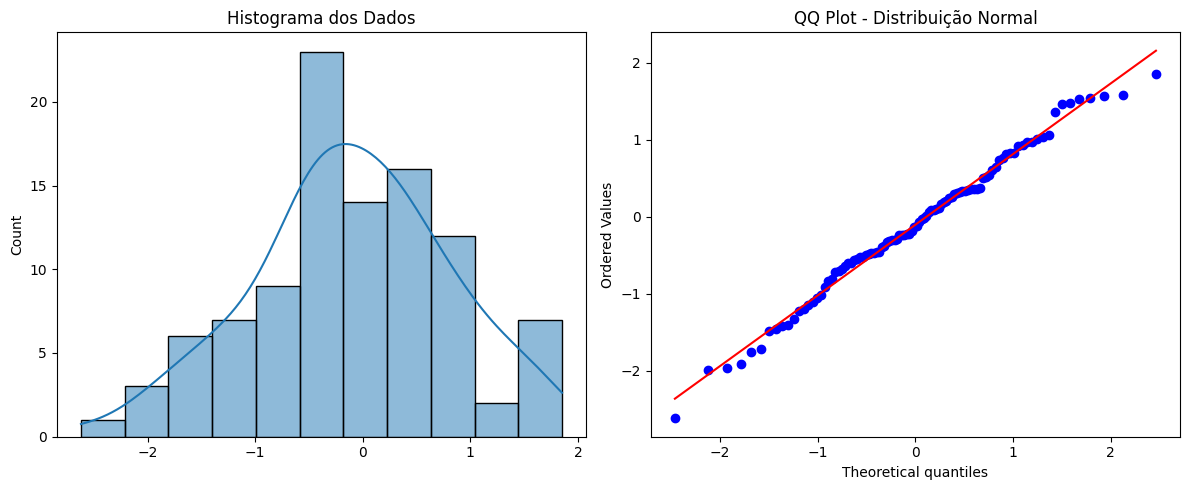

Teste de Shapiro-Wilk: Estatística=0.9898831844329834, Valor-p=0.6551515460014343
Aceita H0: Os dados podem ser aproximadamente normais.
Métodos paramétricos podem ser apropriados.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro
import seaborn as sns

def normality_test_decision(data, alpha=0.05):
    """
    Realiza o teste de normalidade de Shapiro-Wilk e fornece uma recomendação
    com base nos resultados.

    Parameters:
    - data: Um array ou lista com os dados a serem testados.
    - alpha: Nível de significância para o teste.

    Returns:
    - Recomendação sobre a escolha de métodos paramétricos ou não paramétricos.
    """

    # Realizar teste de normalidade de Shapiro-Wilk
    stat, p_value = shapiro(data)

    # Visualizar os dados
    plt.figure(figsize=(12, 5))

    # Histograma
    plt.subplot(1, 2, 1)
    sns.histplot(data, kde=True)
    plt.title('Histograma dos Dados')

    # QQ Plot
    plt.subplot(1, 2, 2)
    probplot(data, dist="norm", plot=plt)
    plt.title('QQ Plot - Distribuição Normal')

    plt.tight_layout()
    plt.show()

    # Decisão com base no valor-p
    if p_value > alpha:
        decision = "Aceita H0: Os dados podem ser aproximadamente normais."
        method_recommendation = "Métodos paramétricos podem ser apropriados."
    else:
        decision = "Rejeita H0: Os dados não seguem uma distribuição normal."
        method_recommendation = "Considere métodos não paramétricos."

    print(f"Teste de Shapiro-Wilk: Estatística={stat}, Valor-p={p_value}")
    print(decision)
    print(method_recommendation)

# Exemplo de uso com dados fictícios
np.random.seed(42)
sample_data = np.random.normal(loc=0, scale=1, size=100)
normality_test_decision(sample_data)
